# Leaky Integrate-and-Fire Neuron Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Main function that runs the simulation

In [2]:
def sim(I, DC=True):
    # Function takes arguments: I as current value (or mean value), 
    # DC to specify whether it is direct (constant) current, otherwise noisy
    
    # System parameters
    V_thr = -55e-3           # Threshold voltage (V)
    V_rest = -70e-3          # Rest voltage (V)
    tau = 20e-3              # Membrane time constant (s)
    ref_t = 2e-3             # Refractory time (s)
    R = 100e6                # Membrane resistance (Ohm)
    dt = 1e-4                # Step for the time interval (s)
    t = 0.5                  # End time of simulation (s)

    # Initialising time array
    time = np.arange(0, t, dt)
    
    if DC:
        # Initialising DC current array
        I_list = I * np.ones(int(t / dt))
    else:
        # Initialising noisy current array
        I_list = np.random.normal(I, 0.5 * I, len(time))
    
    # Initialising voltage array
    V = np.zeros(int(t / dt))

    # Initial conditions for voltage (setting it at rest voltage)
    V[0] = V_rest

    # Refractory state (If positive, we are in the refractory period, 
    # neuron can't spike or even tend towards rest voltage)
    ref = 0

    for i in range(len(time) - 1):
        # If refractory state is positive, voltage can't change, stays at rest value
        if (ref > 0):
            V[i] = V_rest
            ref -= 1
        # We check if voltage reaches threshold, neuron can spike
        elif (V[i] >= V_thr):
            V[i] = 40e-3             # Maximum membrane voltage during (delta) spike
            ref = int(ref_t / dt)    # Setting refractory state

        # Voltage step
        dV = (-(V[i] - V_rest) + R * I_list[i]) / tau * dt

        # Updating voltage value after step
        V[i + 1] = V[i] + dV
        
    return V, I_list

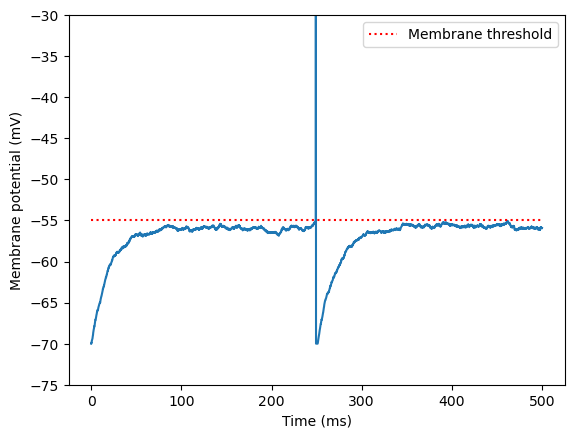

Text(0, 0.5, 'Current (pA)')

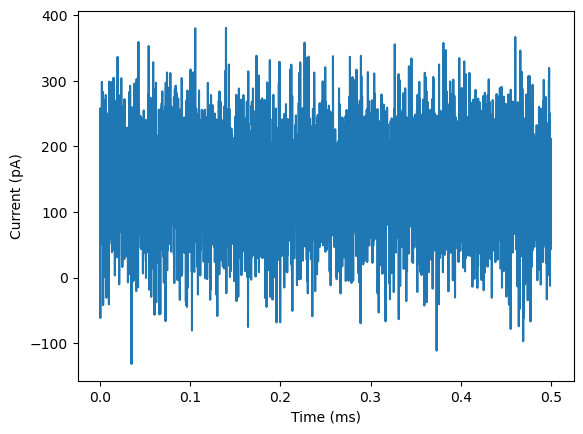

In [15]:
# Simulating the situation (any currents around 140 pA are relevant, 
# DC=False gives noisy current)
v, i = sim(140e-12, DC=False)

plt.plot(1000 * np.arange(0, 0.5, 1e-4), 1000 * v)
plt.hlines(-55, 0, 500, colors='red', linestyles='dotted', label='Membrane threshold')
plt.ylim(-75, -30)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.yticks(np.arange(-75, -25, 5))
plt.legend()
plt.show()
plt.plot(np.arange(0, 0.5, 1e-4), 1e12 * i)
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')